# 语音特征信号识别问题

导入数据：

In [1]:
%cd ~/Projects/untitlednn/schoolwork/

/Users/c/Projects/untitlednn/schoolwork


In [2]:
import pandas as pd

full_df = pd.DataFrame()
for i in range(1, 5):
    df = pd.read_csv(f'data/data{i}.csv', header=None)
    full_df = full_df.append(df)
full_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,-14.827132,-3.001086,1.520908,3.955348,-1.099180,2.067763,2.231175,-0.958398,-2.516055,...,3.400569,0.661319,-2.766376,-2.527010,-0.887411,-0.617081,1.347468,1.422359,0.941648,0.213977
1,1,-16.228861,-2.801874,-0.410816,1.475467,-1.898392,0.085249,3.726985,3.293378,3.411859,...,0.856266,-2.322851,-0.489826,-0.005019,-1.447650,1.317829,2.688266,0.242777,-0.013173,0.320708
2,1,-15.124284,-2.598713,-0.359966,1.345838,-0.348833,1.971445,3.553833,2.349538,1.702098,...,-0.621471,-2.087711,3.052958,-0.632226,-3.463121,2.745615,3.066273,-0.281594,-0.228980,0.596002
3,1,-15.703142,-2.530057,0.255003,-0.179335,0.947239,3.381178,0.231524,2.729425,1.447020,...,-0.107419,-1.012980,1.677292,-1.426028,-2.729764,-0.134800,1.312434,0.055522,-0.097416,0.491487
4,1,-17.789216,-3.328424,0.255791,1.651183,2.057441,-0.528540,-1.215776,3.442000,3.065773,...,-0.417164,-1.088381,0.635619,-2.002649,-1.894483,-0.523285,1.364343,-0.099305,0.513489,0.284901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4,7.190856,-0.056759,5.382569,-13.531778,-1.161882,-0.204710,-9.162922,4.131636,3.737617,...,-2.043181,-2.436982,2.827389,-2.219489,1.385235,2.363008,-0.223693,-2.185853,0.207026,-0.219105
496,4,7.415693,-1.408122,5.599443,-12.445075,-1.722017,-0.949308,-6.659379,4.100050,4.576378,...,-4.539266,1.064208,0.335677,-0.127662,5.348143,1.315022,-0.057730,-0.556014,1.679079,-0.541798
497,4,7.563914,-3.206239,4.922431,-9.844637,-3.385838,-1.552266,-5.020453,5.362929,3.826636,...,-7.193123,0.973143,-2.661396,0.955371,7.583861,1.970079,0.149923,2.163521,1.589259,-0.652960
498,4,5.077865,-5.722349,0.719459,-10.102286,-2.862943,-0.713429,-1.751949,6.045263,4.479267,...,-10.817413,-2.947997,-3.411523,1.736462,7.250574,1.224108,-0.034888,4.351948,2.320264,-0.461395


打乱顺序：

In [3]:
shuffled_df = full_df.sample(frac=1.0)
shuffled_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
370,4,0.434786,3.845882,-3.467788,-3.770982,-4.529972,2.018786,-5.001408,13.903144,6.938704,...,1.928406,-0.025162,-3.816924,-6.229505,1.947279,4.284879,-1.394635,-3.225744,-0.748868,0.518862
448,4,-4.587108,0.054501,1.913466,3.801278,5.442762,1.987819,-2.669119,2.299736,0.696190,...,6.281139,3.046447,2.872495,6.300110,4.974455,5.662925,2.430268,2.014565,-0.049165,0.417764
72,1,-10.315852,3.384872,-0.584831,-1.332112,-2.088518,-0.588885,1.581876,3.629779,3.792053,...,-0.355268,1.867148,-3.640988,0.150169,-7.605118,-2.907620,0.065612,-2.303785,1.341823,-0.180038
358,3,-14.102504,-3.513867,-2.529072,-0.764417,0.639227,4.687677,5.256490,2.229466,4.879321,...,-2.445223,-1.542656,2.668489,2.578780,2.564669,1.860014,-0.802099,0.377526,-0.058984,0.240883
166,3,-13.781430,-5.594676,-3.267520,0.175659,0.914479,6.730397,2.643623,5.265419,1.366230,...,-0.152655,-4.085738,-2.483079,-2.303131,-2.321737,3.224841,2.865851,2.537357,-0.017308,0.183198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,2,-8.717013,-4.394144,-6.607750,-5.957029,-5.500636,-4.609003,-0.732479,0.115237,-0.722335,...,-0.495832,3.198719,1.341430,1.762988,-1.612264,0.180926,1.970736,1.442808,0.569899,-0.234729
207,1,-15.384708,-1.546202,-2.146414,-0.693004,0.126809,6.471527,-0.518284,5.651614,4.293155,...,-0.325160,2.461026,0.985265,-4.583760,-2.477705,0.515644,-0.466109,0.822481,-0.046080,-0.217706
454,4,-2.682411,-3.066342,2.640781,0.455114,-1.346243,-0.276417,-2.212989,1.901186,0.847218,...,-5.015357,5.178168,-4.622857,-4.655458,5.026007,-0.926137,-1.378239,-2.706190,1.334837,0.002271
211,3,-13.689377,-2.640582,-0.072165,0.143359,3.679362,5.342302,-1.096928,1.910284,-0.403032,...,0.826974,0.087216,-2.833264,-2.440557,1.315706,-2.046298,-3.194556,-0.575254,0.240374,0.144634


分离数据和标签：

In [4]:
labels = shuffled_df.values[:, 0]
labels.shape

(2000,)

In [5]:
data = shuffled_df.values[:, 1:]
data.shape

(2000, 24)

分训练集、测试集：

In [6]:
train_x = data[:1500]
train_y = labels[:1500]

test_x = data[1500:]
test_y = labels[1500:]

数据逐特征标准化:

In [7]:
import numpy as np

x_mean = train_x.mean(axis=0)
x_range = train_x.max(axis=0) - train_x.min(axis=0)

train_x -= x_mean
train_x /= x_range

test_x -= x_mean
test_x /= x_range

In [8]:
print('train_x:', np.max(train_x), np.min(train_x), np.mean(train_x))
print('test_x:', np.max(test_x), np.min(test_x), np.mean(train_x))

train_x: 0.6753620082546118 -0.7072329206039802 -1.0485439677015367e-18
test_x: 0.6368769337965755 -0.7795960641949204 -1.0485439677015367e-18


标签 one-hot 编码：

In [9]:
def one_hot(targets, num_classes):
    return np.eye(num_classes)[targets.astype('int32').reshape(-1)]

# [1, 4] => [0, 3]
train_y -= 1
test_y -= 1

# one-hot
train_y = one_hot(train_y, 4)
test_y = one_hot(test_y, 4)

print(train_y.shape, test_y.shape)

(1500, 4) (500, 4)


## Tensorflow

构建网络：

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from tensorflow.keras import layers

def build_model():
    input_tensor = Input(shape=(train_x.shape[1], ))
    x = layers.Dense(256, activation='relu')(input_tensor)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    output_tensor = layers.Dense(4, activation='softmax')(x)
    
    model = Model(input_tensor, output_tensor)
    
    model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model

训练模型：

In [11]:
model_tf = build_model()
model_tf.summary()

history = model_tf.fit(train_x, train_y,
                    validation_split=0.1, 
                    epochs=10, batch_size=128)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24)]              0         
_________________________________________________________________
dense (Dense)                (None, 256)               6400      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1028      
Total params: 73,220
Trainable params: 73,220
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
11/11 [==============================] - 0s 15ms/step - loss: 1.1807 - accuracy: 0.5881 - val_loss: 0.950

绘制拟合过程曲线：

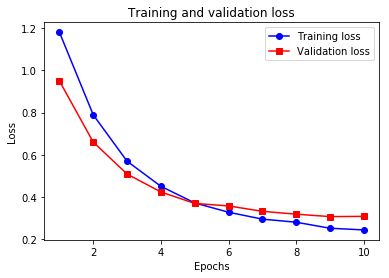

In [12]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'rs-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

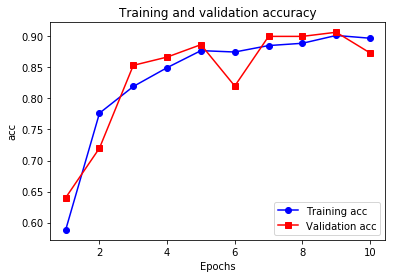

In [13]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'rs-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

在测试集评估结果：

In [14]:
model_tf.evaluate(test_x, test_y, batch_size=128)

4/4 [==============================] - 0s 4ms/step - loss: 0.2850 - accuracy: 0.8700


[0.2849743068218231, 0.8700000047683716]

## UntitledNN

In [15]:
%cd ~/Projects/untitlednn

/Users/c/Projects/untitlednn


In [16]:
from untitlednn.tensor import Tensor
from untitlednn.nn import NeuralNetwork
from untitlednn.layer import Dense, ReLU, Dropout
from untitlednn.model import Model
from untitlednn.loss import SoftmaxCrossEntropy
from untitlednn.optimizer import Adam
from untitlednn.evaluator import OneHotAccEvaluator

In [17]:
validation_split = 0.1
validation_split_idx = int(validation_split * train_x.shape[0])

train_x = Tensor(train_x[validation_split_idx:])
train_y = Tensor(train_y[validation_split_idx:])

validation_x = Tensor(train_x[:validation_split_idx])
validation_y = Tensor(train_y[:validation_split_idx])

test_x = Tensor(test_x)
test_y = Tensor(test_y)

print(train_x.shape, validation_x.shape)

(1350, 24) (150, 24)


In [18]:
# construct network
network = NeuralNetwork([
    Dense(train_x.shape[1], 256),
    ReLU(),
    Dense(256, 256),
    ReLU(),
    Dropout(0.8),
    Dense(256, 4),
])

In [19]:
# build model
model_unn = Model(network,
              loss=SoftmaxCrossEntropy(),
              optimizer=Adam(lr=1e-3),
              evaluator=OneHotAccEvaluator)

model_unn.summary()
model_unn

Model: "Model_5443062416"
____________________________
Layer	OutputShape	Param#
Dense		256		6400
ReLU		None		0
Dense		256		65792
ReLU		None		0
Dropout		None		0
Dense		4		1028
Trainable Params: 73220



In [20]:
model_unn.fit(train_x, train_y, 
              batch_size=128, 
              epochs=10, 
              validation_data=(validation_x, validation_y))

Epoch 1/10:	train 0.0645s, evaluate 0.0017s	{'total_num': 150, 'hit_num': 71, 'accuracy': 0.47333333333333333, 'loss': 5.617201668616183}
Epoch 2/10:	train 0.0454s, evaluate 0.0015s	{'total_num': 150, 'hit_num': 71, 'accuracy': 0.47333333333333333, 'loss': 5.557947687832552}
Epoch 3/10:	train 0.0492s, evaluate 0.0015s	{'total_num': 150, 'hit_num': 96, 'accuracy': 0.64, 'loss': 5.469395175746053}
Epoch 4/10:	train 0.0459s, evaluate 0.0016s	{'total_num': 150, 'hit_num': 118, 'accuracy': 0.7866666666666666, 'loss': 5.371884968996006}
Epoch 5/10:	train 0.0442s, evaluate 0.0018s	{'total_num': 150, 'hit_num': 111, 'accuracy': 0.74, 'loss': 5.272385860618347}
Epoch 6/10:	train 0.0453s, evaluate 0.0015s	{'total_num': 150, 'hit_num': 117, 'accuracy': 0.78, 'loss': 5.30046287734898}
Epoch 7/10:	train 0.0467s, evaluate 0.0020s	{'total_num': 150, 'hit_num': 128, 'accuracy': 0.8533333333333334, 'loss': 5.254025036027119}
Epoch 8/10:	train 0.0447s, evaluate 0.0016s	{'total_num': 150, 'hit_num': 134,

In [21]:
model_unn.evaluate(test_x, test_y)

{'total_num': 500, 'hit_num': 434, 'accuracy': 0.868}